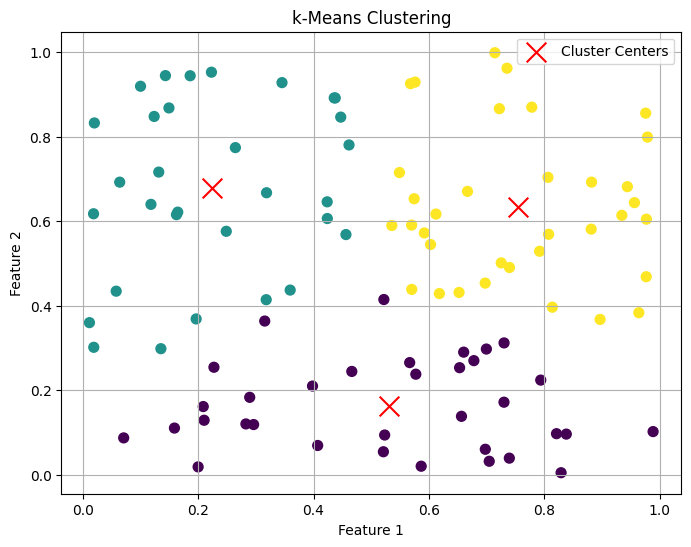

In [4]:
#k-Means clustering used to learn patterns and group data points into clusters 
#based on their simularities.

#import NumPy library and aliases it as np
import numpy as np

#import matplotlib to create visualizations (i.e plots, charts)
import matplotlib.pyplot as plt

#impor scikit-learn, the machine leanring library, used for data analysis and modeling
from sklearn.cluster import KMeans

#Generate synthetic data, produce random data each time
np.random.seed(0)

#2D random array with 100 data points
data = np.random.rand(100, 2)

#number of clusters/groupings to create
n_clusters = 3
#get KMeans object
kmeans = KMeans(n_clusters=n_clusters, random_state = 0, n_init = 10)

#learn and estimate the parameters of the transformation based on the learning algorithm
kmeans.fit(data)

#visualisation of the data below

#create matplotlib figure and set size
plt.figure(figsize = (8, 6))

#plot data points with color-coded clusters
labels = kmeans.labels_

#scatter plot
plt.scatter(data[:,0], data[:, 1], c = labels, cmap = 'viridis', s = 50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c = 'red', marker = 'x', s = 200, label = 'Cluster Centers')

#set labels for x and y axis
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

#chart name
plt.title('k-Means Clustering')

#add legend
plt.legend()

#add grid
plt.grid(True)
plt.show()


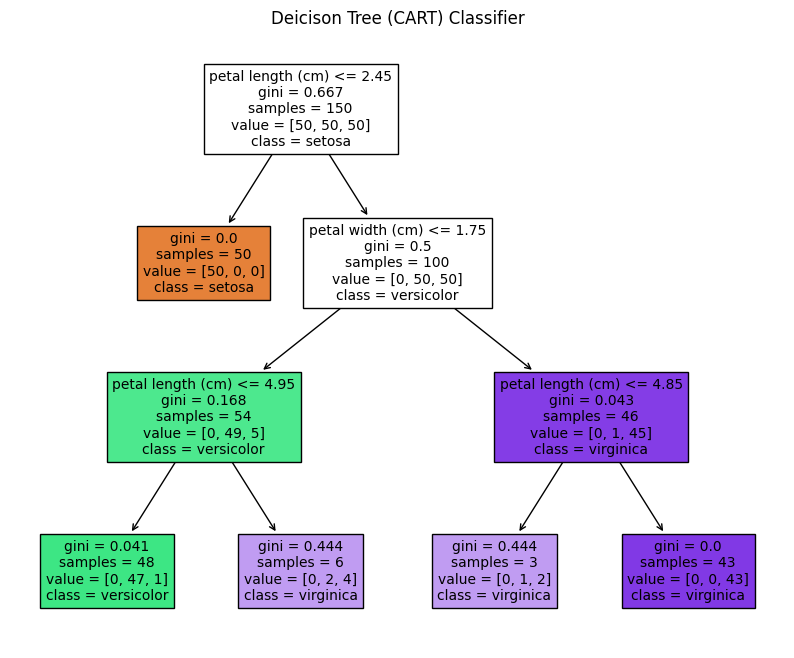

In [2]:
# CART (classification and Regression Trees) algorithms for decision tree classification.
import matplotlib.pyplot as plt
#import iris dataset from scikit-learn library
from sklearn.datasets import load_iris

#import Decision Tree Classifier to create decision tree models
from sklearn.tree import DecisionTreeClassifier

#import for visualizing decision tree
from sklearn import tree

#load iris dataset
iris = load_iris()

#select 2 features (petal width and ptal length)
X = iris.data[:, 2:]

#labels are the iris flower
y = iris.target 

#create and train a Decision Tree Classifier
clf = DecisionTreeClassifier(max_depth=3)

#Learn and estimate the parameters of the transformation based on the learning algorithm
clf.fit(X, y)

#define class names as a list
class_names = [iris.target_names[i] for i in range(3)]

#visualization of the data

#create matplotlib figure and set size
plt.figure(figsize = (10, 8))

#plot decision tree
tree.plot_tree(clf, filled = True, feature_names = iris.feature_names[2:], class_names = class_names)

#tree chart name
plt.title("Deicison Tree (CART) Classifier")

plt.show()






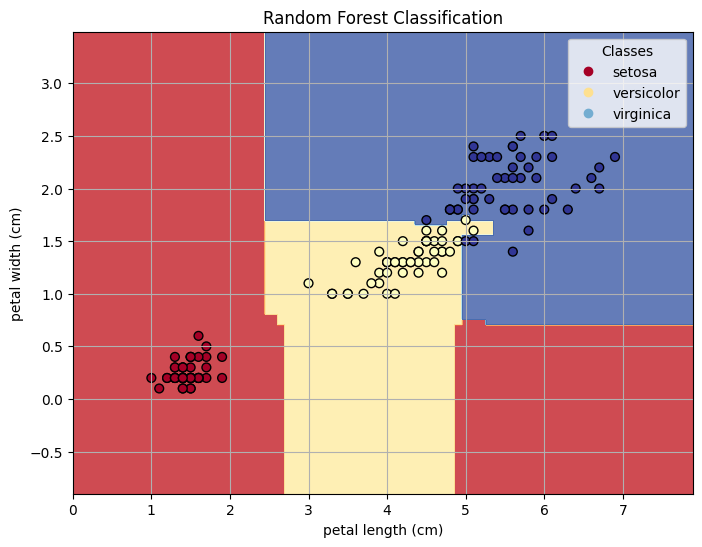

In [4]:
#Random forest is a learning method that combines multple decision trees to improve classfication accuracy
import numpy as np
import matplotlib.pyplot as plt
#import random forest classifier

from sklearn.ensemble import RandomForestClassifier

#random forest is dependent on iris dataset from previous block, run in order or this block will NOT WORK

#create and train a Random Forest Classifier
clf = RandomForestClassifier(n_estimators = 100, random_state = 0)

#learn and estimate the parameters of the trandformation based on the learning algorithm
clf.fit(X, y)

#visualization of the data

#create matplotlib figure and set size
plt.figure(figsize = (8, 6))

#plot decision bounderies based on iris
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha = 0.8, cmap = plt.cm.RdYlBu)

#plot data points
scatter = plt.scatter(X[:, 0], X[:, 1], c = y, cmap = plt.cm.RdYlBu, s = 40, edgecolors = 'k')
plt.xlabel(iris.feature_names[2])
plt.ylabel(iris.feature_names[3])

#add legend
handles, labels = scatter.legend_elements(num = 3)
plt.legend(handles, [iris.target_names[0], iris.target_names[1], iris.target_names[2]], title = 'Classes')

#chart name
plt.title('Random Forest Classification')

#add grid 
plt.grid(True)
plt.show()



Epoch 1/10
25/25 [==============================] - 0s 1ms/step - loss: 0.7885 - accuracy: 0.5238 
Epoch 2/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5736 - accuracy: 0.7763
Epoch 3/10
25/25 [==============================] - 0s 1ms/step - loss: 0.5276 - accuracy: 0.8462
Epoch 4/10
25/25 [==============================] - 0s 972us/step - loss: 0.4934 - accuracy: 0.8350
Epoch 5/10
25/25 [==============================] - 0s 2ms/step - loss: 0.4548 - accuracy: 0.8438
Epoch 6/10
25/25 [==============================] - 0s 1ms/step - loss: 0.4234 - accuracy: 0.8475
Epoch 7/10
25/25 [==============================] - 0s 1ms/step - loss: 0.3999 - accuracy: 0.8562
Epoch 8/10
25/25 [==============================] - 0s 1ms/step - loss: 0.3826 - accuracy: 0.8587
Epoch 9/10
25/25 [==============================] - 0s 989us/step - loss: 0.3677 - accuracy: 0.8612
Epoch 10/10
7/7 [==============================] - 0s 1ms/step - loss: 0.3563 - accuracy: 0.8750
Test Accuracy: 0

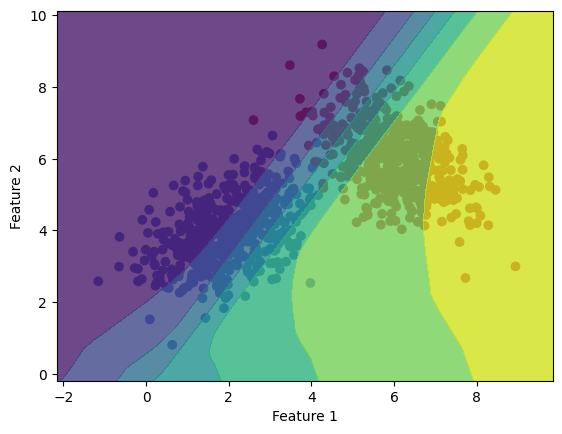

In [5]:
#Using TensorFlow to generate synthetic customer data and performing customer
#segmentation

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#set random see for reproducibility
tf.random.set_seed(42)

#define the number of customers and features
num_customers = 1000
num_features = 2

#generate synthetic data
mean1 = [2, 4]
cov1 = [[1, 0.5], [0.5, 1]]
data1 = np.random.multivariate_normal(mean1, cov1, num_customers // 2)

mean2 = [6, 6]
cov2 = [[1, -0.5], [-0.5, 1]]
data2 = np.random.multivariate_normal(mean2, cov2, num_customers // 2)

data = np.vstack((data1, data2)).astype(np.float32)

labels = np.array([0] * (num_customers // 2) + [1] * (num_customers // 2), dtype = np.int32)

dataset = tf.data.Dataset.from_tensor_slices((data, labels))

#split the dataset into training and testing sets
train_size = int(0.8 * num_customers)
train_dataset = dataset.take(train_size)
test_dataset = dataset.skip(train_size)

#define a simple neural network model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape = (num_features,)),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid'),
])

#complete the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

#train the model
model.fit(train_dataset.batch(32), epochs = 10)

#evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(test_dataset.batch(32))
print(f'Test Accuracy: {test_accuracy}')

#generate predictions for the test data
predictions = model.predict(test_dataset.batch(32))

#visualize the synthetic data and decision boundary
plt.scatter(data[:, 0], data[:, 1], c = labels, cmap = 'coolwarm')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

#generate a meshgrid of points for decision boudnary plotting
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#plot decision boundary
plt.contourf(xx, yy, Z, alpha = 0.8)
plt.show()
